In [2]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from helper import fig_path

sns.set_theme(context="paper", style="darkgrid", rc={"axes.facecolor": "0.96"})
fontsize = "x-large"
params = {
    "font.family": "serif",
    "font.sans-serif": ["Computer Modern"],
    "axes.labelsize": fontsize,
    "axes.titlesize": fontsize,
    "legend.fontsize": fontsize,
    "xtick.labelsize": fontsize,
    "ytick.labelsize": fontsize,
    "figure.titlesize": fontsize,
    "legend.handlelength": 2,
}
plt.rcParams.update(params)
plt.rc("text", usetex=True)

In [3]:
dfs = []
for model in ["mlp", "dnn", "conv"]:
    for latent_dim in [1, 10, 20, 50, 100]:
        df_i = pd.read_csv(f"./vae_data/latent_dim_{latent_dim}_vanilla_{model}_vae_bmnist.csv")
        df_i["model"] = model
        df_i["latent_dim"] = latent_dim
        dfs.append(df_i)
df = pd.concat(dfs, ignore_index=True)
df_mlp = df.loc[df["model"] == "mlp"]
df_dnn = df.loc[df["model"] == "dnn"]
df_conv = df.loc[df["model"] == "conv"]
df

,bce,elbo,kld,epoch,model,latent_dim
0,177.202220,180.815250,3.613028,1,mlp,1
1,170.936810,174.122160,3.185350,2,mlp,1
2,162.267210,165.390340,3.123117,3,mlp,1
3,160.302490,163.465900,3.163399,4,mlp,1
4,159.086980,162.175320,3.088343,5,mlp,1
...,...,...,...,...,...,...
1495,37.277855,68.503480,31.225622,96,conv,100
1496,37.352146,68.497270,31.145126,97,conv,100
1497,37.276936,68.486680,31.209743,98,conv,100
1498,37.366230,68.488080,31.121850,99,conv,100


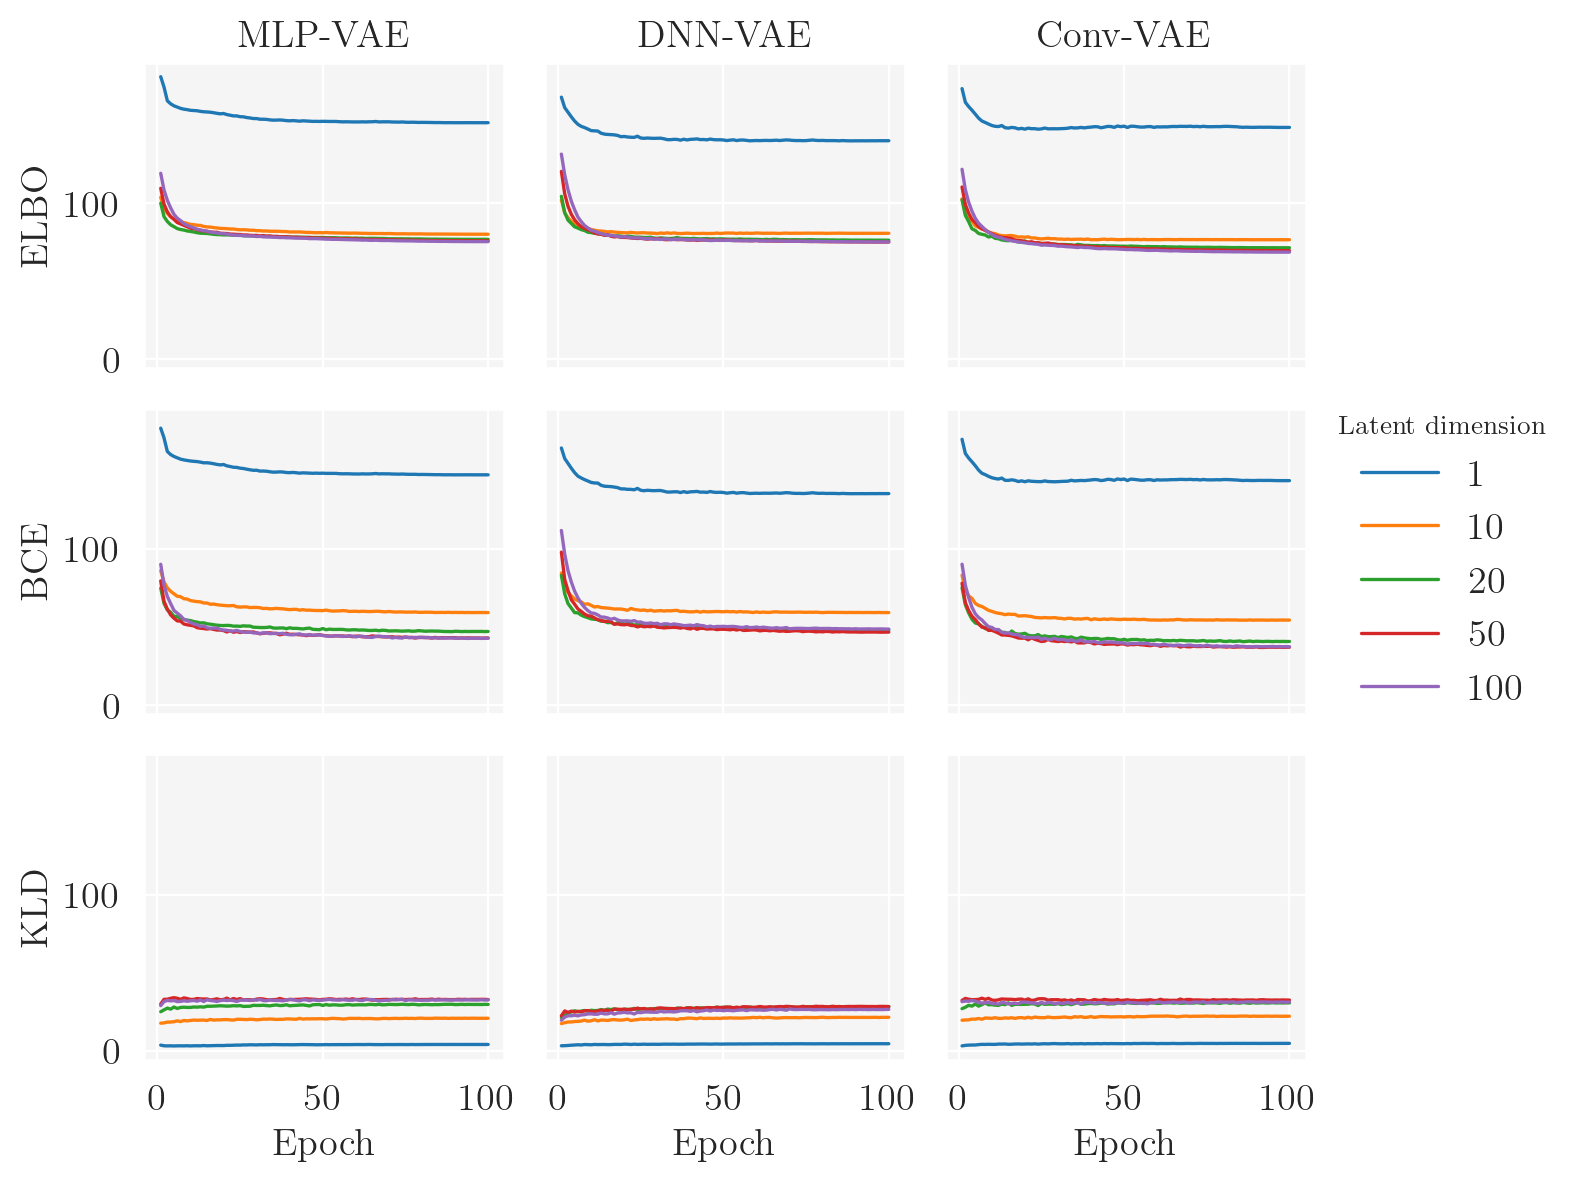

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(8, 6), tight_layout=True)

sns.lineplot(data=df_mlp, x="epoch", y="elbo", hue="latent_dim", palette="tab10", ax=axes[0, 0])
axes[0, 0].set(title="MLP-VAE", xlabel="Epoch", ylabel="ELBO")

sns.lineplot(data=df_dnn, x="epoch", y="elbo", hue="latent_dim", palette="tab10", ax=axes[0, 1])
axes[0, 1].set(title="DNN-VAE", xlabel="Epoch", ylabel="ELBO")

sns.lineplot(data=df_conv, x="epoch", y="elbo", hue="latent_dim", palette="tab10", ax=axes[0, 2])
axes[0, 2].set(title="Conv-VAE", xlabel="Epoch", ylabel="ELBO")

sns.lineplot(data=df_mlp, x="epoch", y="bce", hue="latent_dim", palette="tab10", ax=axes[1, 0])
axes[1, 0].set(xlabel="Epoch", ylabel="BCE")
sns.lineplot(data=df_dnn, x="epoch", y="bce", hue="latent_dim", palette="tab10", ax=axes[1, 1])
axes[1, 1].set(xlabel="Epoch", ylabel="BCE")
sns.lineplot(data=df_conv, x="epoch", y="bce", hue="latent_dim", palette="tab10", ax=axes[1, 2])
axes[1, 2].set(xlabel="Epoch", ylabel="BCE")

sns.lineplot(data=df_mlp, x="epoch", y="kld", hue="latent_dim", palette="tab10", ax=axes[2, 0])
axes[2, 0].set(xlabel="Epoch", ylabel="KLD")
sns.lineplot(data=df_dnn, x="epoch", y="kld", hue="latent_dim", palette="tab10", ax=axes[2, 1])
axes[2, 1].set(xlabel="Epoch", ylabel="KLD")
sns.lineplot(data=df_conv, x="epoch", y="kld", hue="latent_dim", palette="tab10", ax=axes[2, 2])
axes[2, 2].set(xlabel="Epoch", ylabel="KLD")

axes[0, 0].get_legend().remove()
axes[0, 1].get_legend().remove()
axes[0, 2].get_legend().remove()
axes[1, 0].get_legend().remove()
axes[1, 1].get_legend().remove()
axes[2, 0].get_legend().remove()
axes[2, 1].get_legend().remove()
axes[2, 2].get_legend().remove()
handles, labels = axes[1, 2].get_legend_handles_labels()
axes[1, 2].legend(
    handles,
    labels,
    title="Latent dimension",
    loc="center left",
    bbox_to_anchor=(1.04, 0.5),
    fancybox=True,
    borderaxespad=0.1,
    ncol=1,
    frameon=False,
)

fig.savefig(fig_path("loss_latent_dim_vanilla_mlp_dnn_vae_bmnist.pdf"), bbox_inches="tight")